## Customer Life Time Value Prediction

**Aim:** Predict the life time value of customers for a business based on their histotical interactions. </br>

**Description:** Apply regression techniques to estimate the future value that a customer will bring to the business </br>

**Technologies:** Python, Pandas, Scikit-Learn, stasmodels</br>

**Statistics Techniques:** Regression modeling for predicting customer lifetime value

### Online Retail - dataset

About this file

Attribute Information:

**InvoiceNo:** Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation. </br>
**StockCode:** Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product. </br>
**Description:** Product (item) name. Nominal.</br>
**Quantity:** The quantities of each product (item) per transaction. Numeric.</br>
**InvoiceDate:** Invice date and time. Numeric. The day and time when a transaction was generated.</br>
**UnitPrice:** Unit price. Numeric. Product price per unit in sterling (Â£).</br>
**CustomerID:** Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.</br>
**Country:** Country name. Nominal. The name of the country where a customer resides.

In [154]:
#libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np

# statistics models
import statsmodels.api as sm

In [155]:
import warnings
warnings.filterwarnings("ignore")

In [156]:
df = pd.read_excel("Online_Retail.xlsx", sheet_name="Online Retail")
#We can use Online_Retail_II

In [157]:
aux=df

In [158]:
df.head(4)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [160]:
#df['Invoice'] = pd.Categorical(df['Invoice'])
#df['StockCode'] = pd.Categorical(df['StockCode'])
#df['Description'] = pd.Categorical(df['Description'])
#df['Country'] = pd.Categorical(df['Country'])

**Observations:**

We see that there are null values in some columns, and we need to delete them

In [161]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


**Observations:**
* Both columns has negative values like are shown in minimum values, so we need to delete them.
* The first 50% of the people buy less than 3 items, and pay until 4.2
* Almost the 75th percentile of people buy until 10 items, and pay until 4.2
* We need to select or convert the negative values in positive

## 1. Pre-processing of data

First we're going to search letter C at the begin of each value in 'Invoice' column.

In [162]:
df['InvoiceNo'] = df['InvoiceNo'].astype('category')

In [163]:
x=[]
for dat in df['InvoiceNo']:
    x.append(str(dat))
    
df['InvoiceNo'] = x   

cont_code_with_c=0
for dat in df['InvoiceNo']:
    if dat.startswith('c'):
        cont_code_with_c+=1

if cont_code_with_c > 0:
    print("there are codes: ", cont_code_with_c)
else:
    print("There are no codes starting with c")

There are no codes starting with c


In [164]:
df.isnull().sum()
df.isna().sum()

df['Description'].fillna(value='No description', axis=0, inplace=True)

We have filled the null values in Description with 'No description'.

Now we're going drop out all the last missing values in 'Customer ID'

In [165]:
df.dropna(axis=0,inplace=True)
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [166]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [167]:
df['CustomerID'] = df['CustomerID'].astype('int') 
len(df[df['Quantity']<0]) #how many negative values 

8905

In [168]:
df['Quantity'] = np.abs(df['Quantity'])

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int32         
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 26.4+ MB


In [170]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,13.412279,3.460471,15287.690570
std,248.624170,69.315162,1713.600303
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


**Observations:**

* We have cleaned the missing values now we're gonna explore the data
* We will working with 417534 values.
* We have negatives quantities and we have converted them into posive values.

## 2. Exploratory Data Analysis

In [171]:
df['Country'].value_counts()[0:5]

United Kingdom    361878
Germany             9495
France              8491
EIRE                7485
Spain               2533
Name: Country, dtype: int64

In [172]:
list_main_countries = df['Country'].value_counts()[0:5].index.tolist()
list_main_countries

['United Kingdom', 'Germany', 'France', 'EIRE', 'Spain']

In [173]:
df_main=[]

In [174]:
df_main = df[(df['Country']=='United Kingdom')
          | (df['Country']=='EIRE')
          | (df['Country']=='Germany') 
        | (df['Country']=='France') 
       | (df['Country']=='Netherlands') ]

We can see the people from aroun the world and the UK has the highest rate of buyers

In [175]:
#definying a plot
def fine_barplot(dataframe, x_label, perc=False, n=None):
    """
    Barplot with percentage option
    dataframe: df input 
    x_label: the features in datataframe
    perce: do you want percentage option?
    n: the size in x
    """
    
    total = len(dataframe[x_label]) # length of the column
    count = dataframe[x_label].nunique() #count of value uniques
    
    #1. Defining the size of the plot
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n+1, 5))
    
    #2. creating the plot with COUNTPLOT of seaborn and saving it in ax variable
    ax = sns.countplot(
        data=dataframe,
        x=x_label,
        palette="Paired"
    )
    
    #3. Defining the percentage option, getting percentage in "label"
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height()/ total
            ) # setting the percentage of each class of the categor
        else: #Show only the total
            label = p.get_height()
        
        x = p.get_x() + p.get_width() / 2  # width of the bar
        y = p.get_height()  # height of the bar
        
        #here we write what we got in "label"
        ax.annotate(
            label,
            (x,y),
            ha="center",
            va="center",
            size=12,
            xytext=(0,5),
            textcoords="offset points"
        )
    plt.show()

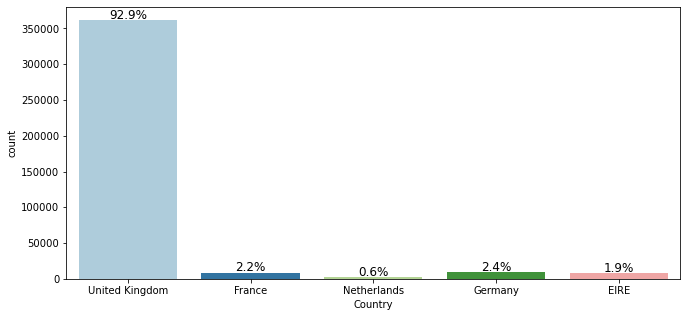

In [176]:
fine_barplot(df_main, 'Country', perc=True, n=10)

We see that UK has the 93.7% of the buyers, so we will analyze based only in UK.

#### 2.1 Filtering UK

In [177]:
df_uk = df[df['Country']=='United Kingdom']

In [178]:
df_uk.shape

(361878, 8)

In [179]:
print(df_uk.columns.tolist())

['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']


In this case we're going to select the main columns to make the analysis: 
* Customer ID, 
* InvoiceDate  
* Invoice: Number of Invoice, 
* Quantity, 
* Price: Unit price

In [180]:
df_uk.rename(columns = {'InvoiceNo':'Invoice'},inplace=True)
df_uk.rename(columns = {'UnitPrice':'Price'},inplace=True)
df_uk.rename(columns = {'CustomerID':'Customer ID'},inplace=True)

In [181]:
main_columns=['Customer ID', 'InvoiceDate', 'Invoice', 'Quantity', 'Price']
df_uk = df_uk[main_columns]

In [182]:
df_uk.head(3)

,Customer ID,InvoiceDate,Invoice,Quantity,Price
0,17850,2010-12-01 08:26:00,536365,6,2.55
1,17850,2010-12-01 08:26:00,536365,6,3.39
2,17850,2010-12-01 08:26:00,536365,8,2.75


**Total Purchase**

In [198]:
df_uk['TotalPurchase'] = df_uk['Quantity']*df_uk['Price']

In [199]:
df_uk.drop(axis=1,columns=['Price'],inplace=True)

In [200]:
df_uk.head(2)

,Customer ID,InvoiceDate,Invoice,Quantity,TotalPurchase
0,17850,2010-12-01 08:26:00,536365,6,15.30
1,17850,2010-12-01 08:26:00,536365,6,20.34


## 2.2 Calculating RFM: Recency, Frequency and Monetary

So we will group and aggregate based in each customer by using 'Customer ID'

In [207]:
df_uk.rename(columns = {'Invoice':'InvoiceNo'},inplace=True)
df_uk.groupby(by=['Customer ID','InvoiceNo']).sum()

Quantity  TotalPurchase
Customer ID InvoiceNo                         
12346       541431        74215       77183.60
            C541433       74215       77183.60
12747       537215          108         358.56
            538537          105         347.71
            541677           88         303.04
...                         ...            ...
18283       579673          134         223.61
            580872          142         208.00
18287       554065          488         765.28
            570715          990        1001.32
            573167          108          70.68

[19857 rows x 2 columns]

In [208]:
df_uk_group = df_uk.groupby('Customer ID').agg({'InvoiceDate': lambda date: (date.max() - date.min()).days,
                                                   'InvoiceNo': lambda num: len(num),
                                                   'Quantity': lambda quant: quant.sum(),
                                                   'TotalPurchase': lambda price: price.sum()
                                                  })

In [209]:
df_uk_group

,InvoiceDate,InvoiceNo,Quantity,TotalPurchase
Customer ID,,,,
12346,0,2,148430,154367.20
12747,366,103,1275,4196.01
12748,372,4642,27286,38367.36
12749,209,231,1520,4313.56
12820,323,59,722,942.34
...,...,...,...,...
18280,0,10,45,180.60
18281,0,7,54,80.82
18282,118,13,108,179.50


In [210]:
#Renaming the columns
df_uk_group.rename(columns={'InvoiceDate':'days', 
                    'InvoiceNo':'transactions',
                    'Quantity':'units',
                    'TotalPurchase':'total_price',
                   }, inplace=True)

In [211]:
df_uk_group.head(2)

,days,transactions,units,total_price
Customer ID,,,,
12346,0,2,148430,154367.20
12747,366,103,1275,4196.01


**days:** number of days that the customer took time to make another purchase </br>
**transactions:** how many invoices the customer has generated </br>
**units:** how many pieces the customer has bought </br>
**total_price:** the added value or incomes generated by the customer to the enterprise

## 2.3 Generating the CLTV (target value)

#### 2.3.1 Average Order Value
Average Sales = (Total Sales)/(total no. of orders), in this case is: total_price / transactions.

In [212]:
df_uk_group['avg_order_value'] = df_uk_group['total_price']/df_uk_group['transactions']

#### 2.3.2 Frequency of purchase
Purchase Frequency = (Total no. of orders)/(Total unique customers), in this case: summation(transactions)/total_customers

In [213]:
purchase_frequency = sum(df_uk_group['transactions'])/len(df_uk_group.index.tolist())

#### 2.3.3 Calculate Repeat Rate and Churn Rate
Churn rate = 1 - Retention Rate </br>
Retention Rate = (Total number of orders greater than 1)/(Total unique customers)

In [214]:
df_uk_group[df_uk_group.transactions > 1].shape[0]/len(df_uk_group.index.tolist())

0.9807594936708861

In [215]:
churn_rate = 1 - df_uk_group[df_uk_group.transactions > 1].shape[0]/len(df_uk_group.index.tolist())
churn_rate

0.019240506329113893

In [216]:
df_uk_group.columns.tolist()

['days', 'transactions', 'units', 'total_price', 'avg_order_value']

#### 2.3.4 Calculate Customer Lifetime Value
(Average_order_value * Purchase_Frequency)/Churn_rate

In [217]:
df_uk_group['CLV'] = (df_uk_group['avg_order_value']*purchase_frequency)/churn_rate

In [218]:
df_uk_group.head(3)

,days,transactions,units,total_price,avg_order_value,CLV
Customer ID,,,,,,
12346,0,2,148430,154367.20,77183.600000,3.675138e+08
12747,366,103,1275,4196.01,40.737961,1.939759e+05
12748,372,4642,27286,38367.36,8.265265,3.935549e+04


In [219]:
df_uk_group.describe()

,days,transactions,units,total_price,avg_order_value,CLV
count,3950.000000,3950.000000,3950.000000,3950.000000,3950.000000,3.950000e+03
mean,133.804304,91.614684,1146.939494,1987.065750,80.000557,3.809269e+05
std,132.935905,220.557389,4883.375951,9348.700952,1840.015628,8.761331e+06
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,17.000000,154.000000,300.835000,11.145000,5.306750e+04
50%,98.500000,41.000000,365.000000,653.085000,17.203814,8.191686e+04
75%,255.000000,101.000000,955.000000,1611.307500,24.333122,1.158634e+05
max,373.000000,7983.000000,161992.000000,336942.100000,84235.525000,4.010919e+08


In [220]:
df_uk_group[df_uk_group['avg_order_value']==0]

,days,transactions,units,total_price,avg_order_value,CLV
Customer ID,,,,,,
13256,0,1,12540,0.0,0.0,0.0


In [221]:
df_uk_group[df_uk_group['total_price']==0].index.tolist()

[13256]

In [223]:
df_uk_group.drop([13256], inplace=True)
#df_uk_group.drop([14103,14827], inplace=True)

In [224]:
df_uk_group.shape[0]

3949

In [225]:
df_uk_group.describe()

,days,transactions,units,total_price,avg_order_value,CLV
count,3949.000000,3949.000000,3949.000000,3949.000000,3949.000000,3.949000e+03
mean,133.838187,91.637630,1144.054444,1987.568932,80.020816,3.810233e+05
std,132.935680,220.580604,4880.626482,9349.831360,1840.248204,8.762439e+06
min,0.000000,1.000000,1.000000,1.250000,1.250000,5.951941e+03
25%,0.000000,17.000000,154.000000,300.850000,11.175000,5.321035e+04
50%,99.000000,41.000000,365.000000,653.350000,17.204091,8.191818e+04
75%,255.000000,101.000000,955.000000,1611.590000,24.334359,1.158693e+05
max,373.000000,7983.000000,161992.000000,336942.100000,84235.525000,4.010919e+08


### 2.3.5 Exploratory Data Analysis in numerical Values

In [226]:
#defining boxplot and histogram in one picture
def box_histo_plot(dataframe, x_label, figsize=(12,7), kde=False, bins=None):
    """
    dataframe: dataframe of data
    xlabel: feaure/s of the dataframe
    figsize: dimensions of the figure
    kde: does it show a density curve?
    bins: number of bins in the histogram (default None)
    """
    
    #1) creating 2 subplots in 2 roes
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True, #share x-axis among all the subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )
    
    #2.1) Adding boxplot in one first subplot
    sns.boxplot(
        data=dataframe, x=x_label, 
        ax=ax_box2, ##adding boxplot in subplot
        color="green"
    )
    ax_box2.axvline(
        dataframe[x_label].mean(), color="yellow", linestyle="-."
    )
    
    #2.2) Adding the histogram in second subplot
    if bins:#if we in arguments input define bins 
        sns.histplot(
            data=dataframe, x=x_labelure, kde=kde, 
            ax=ax_hist2, #addung histogram in subplot
            bins=bins, palette="winter")
    else:
        sns.histplot(data=dataframe, x=x_label, kde=kde, ax=ax_hist2)
    
    #Adding mean line to the histogram
    ax_hist2.axvline(
        dataframe[x_label].mean(), color="yellow", linestyle="-."
    )
    
    #Adding median line to the histogram    
    ax_hist2.axvline(
        dataframe[x_label].median(), color="red", linestyle="--"
    )
    plt.show()

In [227]:
df_uk_group.columns.tolist()

['days', 'transactions', 'units', 'total_price', 'avg_order_value', 'CLV']

### Treatment of Outliers

In [228]:
# functions to treat outliers by flooring and capping
# this method is good to clip outliers

def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) #Replace outliers for beyond than whisker by the whisker value

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

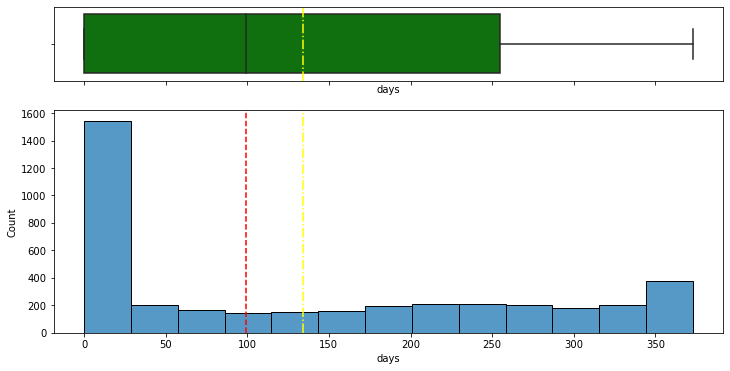

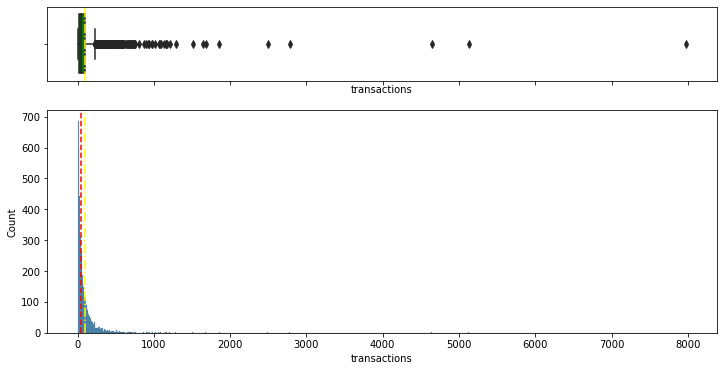

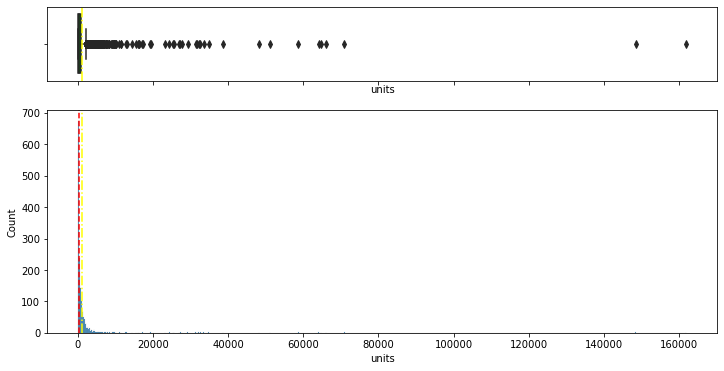

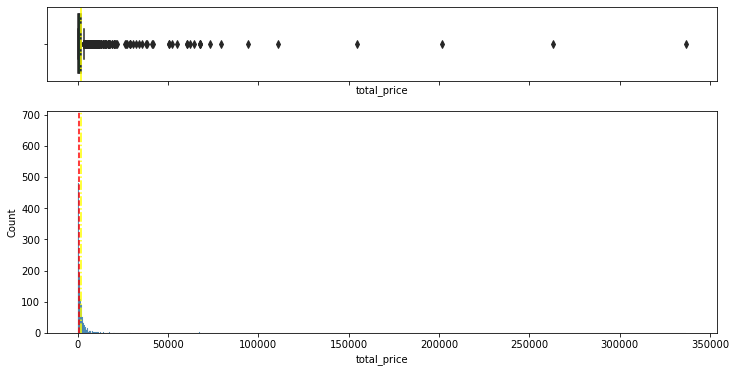

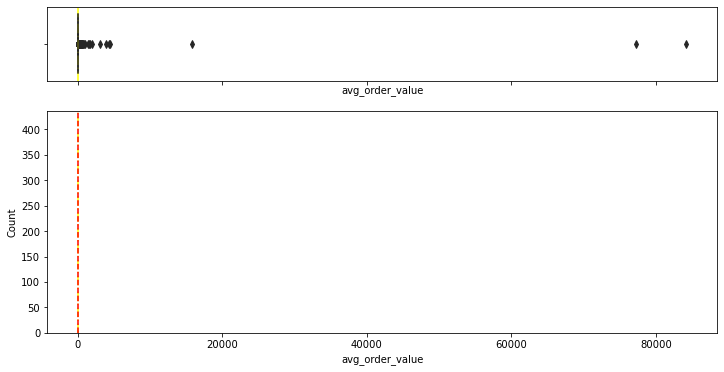

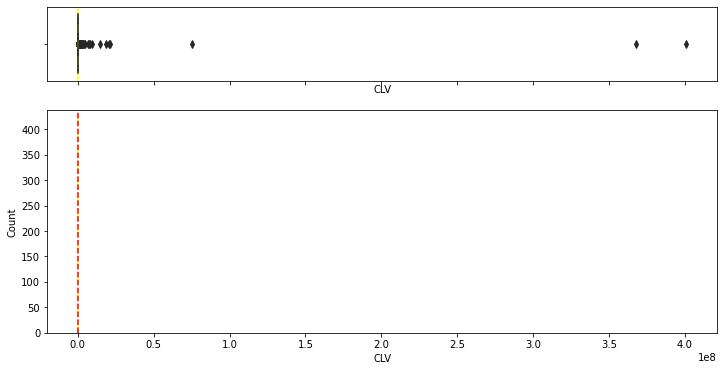

In [229]:
cols=df_uk_group.columns.tolist()
for i in np.linspace(0,5,6,dtype=int):
    box_histo_plot(df_uk_group, cols[i],figsize=(12,6))

In [230]:
df_uk_group.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3949 entries, 12346 to 18287
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   days             3949 non-null   int64  
 1   transactions     3949 non-null   int64  
 2   units            3949 non-null   int64  
 3   total_price      3949 non-null   float64
 4   avg_order_value  3949 non-null   float64
 5   CLV              3949 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 345.0 KB


In [231]:
cols = df_uk_group.columns.tolist()
df_2 = df_uk_group.copy()
df_2 = treat_outliers_all(df_2, cols)

In [232]:
df_2.describe()

,days,transactions,units,total_price,avg_order_value,CLV
count,3949.000000,3949.000000,3949.000000,3949.000000,3949.000000,3949.000000
mean,133.838187,69.414282,661.063560,1120.723106,19.627625,93457.967341
std,132.935680,69.574390,675.019962,1105.740883,11.886265,56597.076011
min,0.000000,1.000000,1.000000,1.250000,1.250000,5951.940789
25%,0.000000,17.000000,154.000000,300.850000,11.175000,53210.350658
50%,99.000000,41.000000,365.000000,653.350000,17.204091,81918.184342
75%,255.000000,101.000000,955.000000,1611.590000,24.334359,115869.331012
max,373.000000,227.000000,2156.500000,3577.700000,44.073397,209857.801544


In [233]:
cols[0]

'days'

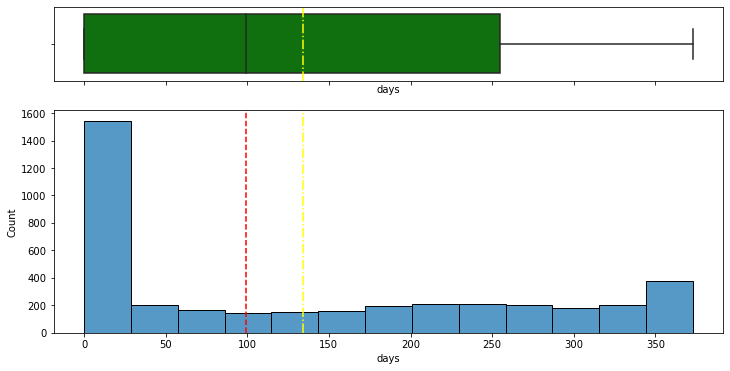

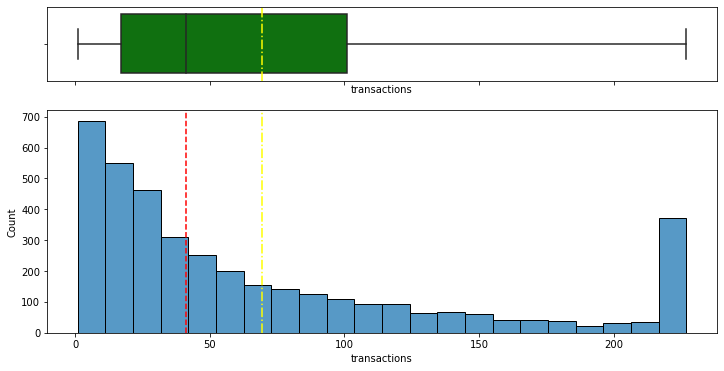

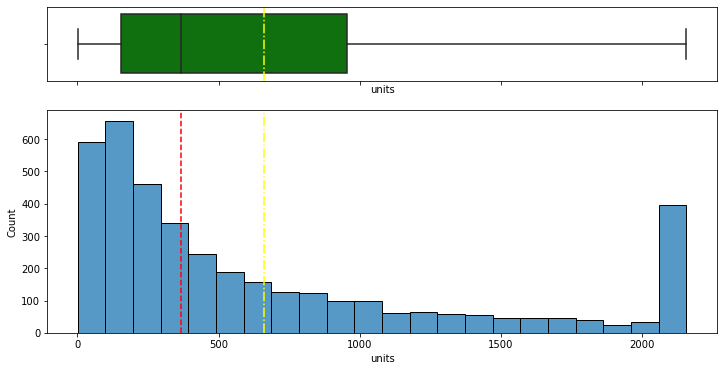

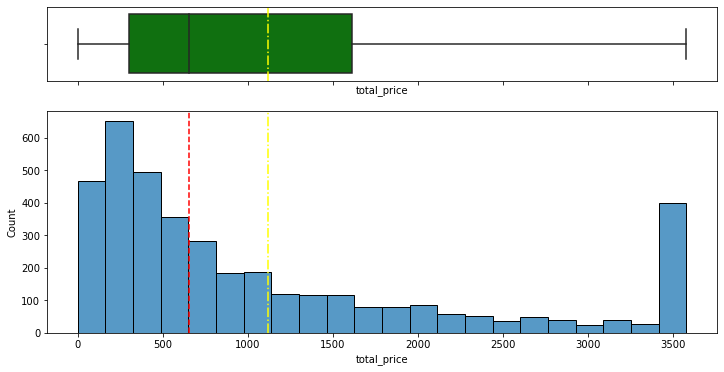

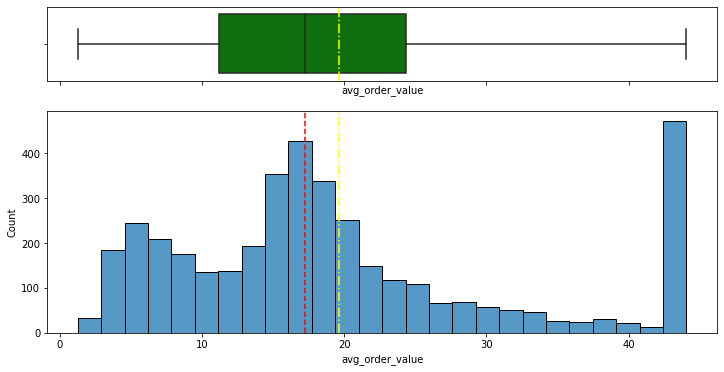

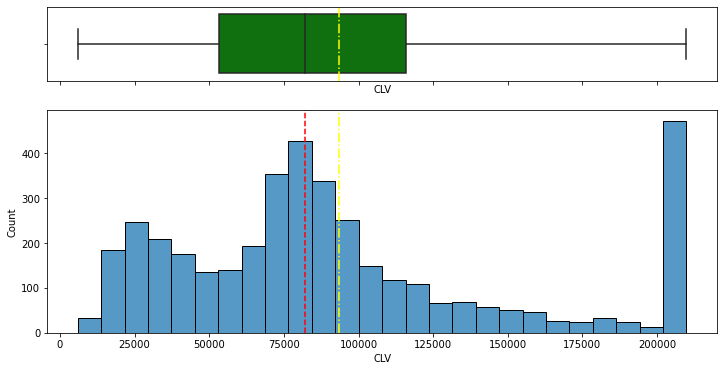

In [234]:
cols=df_2.columns.tolist()
for i in np.linspace(0,5,6,dtype=int):
#    print(i)
    box_histo_plot(df_2,cols[i],figsize=(12,6))

### Bivariate Analysis

In [235]:
df_2[df_2.columns[:]].corr()["CLV"][:]

days               0.038960
transactions      -0.280491
units              0.168470
total_price        0.225086
avg_order_value    1.000000
CLV                1.000000
Name: CLV, dtype: float64

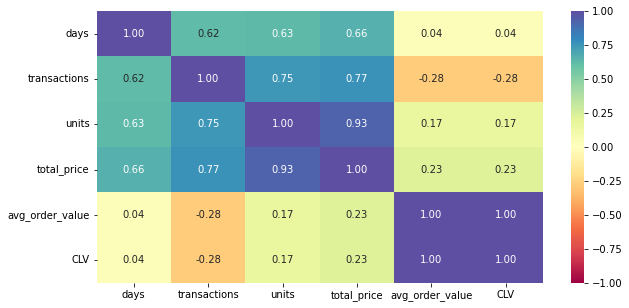

In [236]:
numeric_columns=df_2.select_dtypes(include='number').columns.tolist()
#numeric_columns.remove("price")

#correlations heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(
    df_2[numeric_columns].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
)
plt.show()

## 3. Building Linear Regression Model

In [237]:
df_2.head(3)

,days,transactions,units,total_price,avg_order_value,CLV
Customer ID,,,,,,
12346,0,2.0,2156.5,3577.7,44.073397,209857.801544
12747,366,103.0,1275.0,3577.7,40.737961,193975.946191
12748,372,227.0,2156.5,3577.7,8.265265,39355.494178


In [238]:
features = df_2.columns.tolist()[0:5]
x = df_2[features]
y = df_2['CLV']

#### 3.1 Splitting Data

In [239]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0) #random_state, don't mix the data, mantain the order

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [240]:
X_train.head(3)

,days,transactions,units,total_price,avg_order_value
Customer ID,,,,,
17297,0,51.0,67.0,131.78,2.583922
16654,227,31.0,284.0,607.57,19.599032
13848,273,5.0,2156.5,1255.00,44.073397


In [241]:
y_train.head(3)

Customer ID
17297     12303.478545
16654     93321.823625
13848    209857.801544
Name: CLV, dtype: float64

In [242]:
olsmodel = sm.OLS(y_train, X_train).fit()

In [243]:
print(olsmodel.summary())

                                 OLS Regression Results                                
Dep. Variable:                    CLV   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.318e+33
Date:                Mon, 26 Feb 2024   Prob (F-statistic):                        0.00
Time:                        12:38:47   Log-Likelihood:                          64885.
No. Observations:                2961   AIC:                                 -1.298e+05
Df Residuals:                    2956   BIC:                                 -1.297e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [244]:
ypred = olsmodel.predict(X_train)

MAE = mean_absolute_error(y_train, ypred)
MSE = mean_squared_error(y_train, ypred)
RMSE = np.sqrt(mean_squared_error(y_train, ypred))
R2_score = r2_score(y_train, ypred)

print("Prediction Perfomance on Train Set:")
print("MAE", "{:.3f}".format(MAE))
print("MSE", "{:.3f}".format(MSE))
print("RMSE", "{:.3f}".format(RMSE))
print("R2-Square:","{:.3f}".format(R2_score))

Prediction Perfomance on Train Set:
MAE 0.000
MSE 0.000
RMSE 0.000
R2-Square: 1.000


In [245]:
ypred = olsmodel.predict(X_test)

MAE = mean_absolute_error(y_test, ypred)
MSE = mean_squared_error(y_test, ypred)
RMSE = np.sqrt(mean_squared_error(y_test, ypred))
R2_score = r2_score(y_test, ypred)

print("Prediction Perfomance on Test Set:")
print("MAE", "{:.3f}".format(MAE))
print("MSE", "{:.3f}".format(MSE))
print("RMSE", "{:.3f}".format(RMSE))
print("R2-Square:","{:.3f}".format(R2_score))

Prediction Perfomance on Test Set:
MAE 0.000
MSE 0.000
RMSE 0.000
R2-Square: 1.000


### 3.2 Using the model in test set

In [246]:
X_test.tail(5)

,days,transactions,units,total_price,avg_order_value
Customer ID,,,,,
17153,0,14.0,104.0,213.78,15.270000
16057,280,134.0,893.0,2386.02,17.806119
15599,177,52.0,718.0,761.74,14.648846
15353,113,63.0,343.0,777.02,12.333651
18205,38,32.0,192.0,517.36,16.167500


In [247]:
y_test.tail(5)

Customer ID
17153    72708.908684
16057    84784.774701
15599    69751.251953
15353    58727.327393
18205    76982.402171
Name: CLV, dtype: float64

In [248]:
X_test.iloc[-3:-2]

,days,transactions,units,total_price,avg_order_value
Customer ID,,,,,
15599,177,52.0,718.0,761.74,14.648846


In [249]:
ypred = olsmodel.predict(X_test.iloc[-3:-2])

In [250]:
ypred

Customer ID
15599    69751.251953
dtype: float64

### Plotting the regression linear model

In [251]:
ypred = olsmodel.predict(X_test)

Text(0, 0.5, 'CLV')

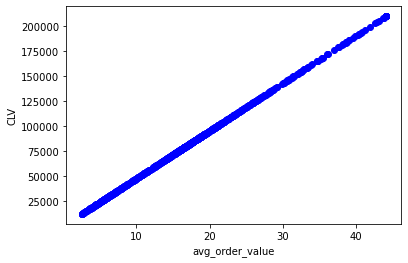

In [252]:
plt.scatter(X_test['avg_order_value'].tolist(), ypred, color="blue")

plt.xlabel("avg_order_value")
plt.ylabel("CLV")

#### Observations:
* We have a highly precise regression linear model, given that the metrics are perfect there is no a percentage or error in the predictions, so it was able to predict either in train and test set
* By imputing the outliers we have gotten a perfect regression model
* In this graph we can see that, the more people buy huge quantity of items, the more value is added to the company